In [1]:
import numpy, math
from matplotlib import pyplot as plt
from matplotlib import patches
from src import code_toggle
%matplotlib inline

# Calculus (cont.)

## Integration by substitution

### Protocol

If we have an integral, $I$, that we can write as 

$$I = \int f(g(x)). dx$$

then 

1. Look at the integral and see if the differential of the bracketed function is outside the brackets. If so, then substitution is an appropriate strategy.
2. Decide on the function $u$ for substitution, find $\frac{du}{dx}$ and thus its reciprocal, $\frac{du}{dx}$. 
3. Substitute $u$ into the integral, multiply the integral by $dx/du$ and simplify by cancelling appropriate terms. 
4. If it is a definite integral, replace the limits by $u$(lower limit) and $u$(upper limit).
5. Perform the integration.
6. Substitute for $u$ in the result to that $x$ is again the variable. 
7. If it is a definite integral, put in the appropriate limits and simplify the result.
8. If it is an indefinite integral, don't forget the constant of integration!

If 

## 'Expectation' values

The *weighted average* where the weight is the probability of the result having a certain value.

e.g. the expected value, $\bar{p}$ of throwing a six-sided die is 

\begin{align*}
\bar{p} &= \frac{1}{6}\times 1 + \frac{1}{6}\times 2 + \frac{1}{6}\times 3 + \frac{1}{6}\times 4 + \frac{1}{6}\times 5 + \frac{1}{6}\times 6\\
&= \frac{1}{6} \sum_{n=1}^{n=6} n\\
&= \frac{1}{6} ( 1 + 2 + 3 + 4 + 5 + 6)\\
&= \frac{21}{6}\\
&= 3.5
\end{align*}

We also call this the average value.

This was a *discreet* example (i.e. the numbers can only take whole values) hence the use of a *discreet* sum as signified by the $\sum$ symbol.

## What is the expectation value of the speed of a molecule of gas?

The probability distribution for the speeds of molecules in an *ideal gas* is given by the Maxwell-Boltzmann distribuion

$$ f(v) = 4 \pi \left ( \frac{m}{2 \pi kT} \right )^{3/2} v^2 e^{-\frac{mv^2}{2kT}} $$

where $v$ is the speed of the molecule, $m$ is the mass of a molecule, $T$ is the absolute temperature (K) and $k$ is Boltzmann's constant ($1.38 \times 10^{-23} $m$^2$ kg s$^{-2}$ K$^{-1}$). It tells us how likely we are to find molecules with speed $v$, for example

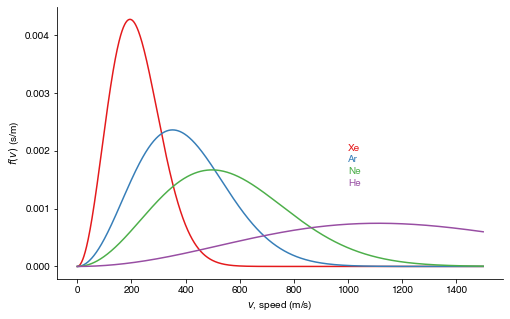

In [57]:
masses={'Xe':131,'Ar':40, 'Ne':20, 'He':4}
colours={'Xe':'#e41a1c','Ar':'#377eb8', 'Ne':'#4daf4a', 'He':'#984ea3'}

v = numpy.linspace(0, 1500, 1500)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

# axis.set_xlim([0,3])
# axis.set_xticks(numpy.arange(0,4))
axis.set_xlabel('$v$, speed (m/s)')
# axis.set_ylim([0,7])
axis.set_ylabel('$f(v)$ (s/m)',rotation=90)
# axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
# axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

k=1.38E-23
T=298
L=6.022E23
y_coord=0.002

for gas in masses.keys():
    
    m=masses[gas]
    m=m/1000


    Q=4*math.pi*(m/(2*L*math.pi*k*T))**1.5
    c=-m/(2*L*k*T)

    f = Q*v**2*numpy.exp(c*v**2)
    
    axis.plot(v, f,color=colours[gas])

    axis.annotate(gas,xy=(1000,y_coord),c=colours[gas])
    y_coord-=0.0002

plt.show()


code_toggle()

### The Gaussian or 'normal' distribution

The 'exponential bit' in the Maxwell-Boltzmann equation is a Gaussian, i.e. looks like:

$$ P(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2/2\sigma^2} $$

where $\mu$ is the *expectation value* of the variable $x$ which has variance $\sigma^2$ (and hence standard deviation $\sigma$).

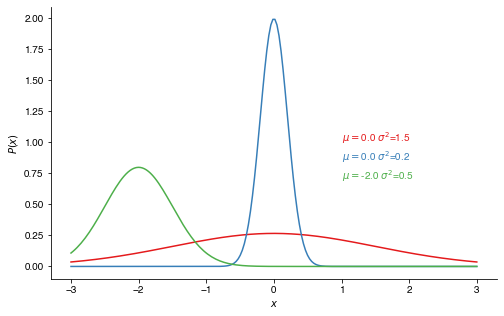

In [73]:
constants=[(0,1.5,'#e41a1c'),(0,0.2,'#377eb8'),(-2,0.5,'#4daf4a')]

x = numpy.linspace(-3, 3, 200)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

# axis.set_xlim([0,3])
# axis.set_xticks(numpy.arange(0,4))
axis.set_xlabel('$x$')
# axis.set_ylim([0,7])
axis.set_ylabel('$P(x)$',rotation=90)
# axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
# axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

k=1.38E-23
T=298
L=6.022E23
y_coord=1

for (mu,sigma,color) in constants:
    
    prefactor=1/(sigma*(2*math.pi)**0.5)
    
    power=-1*(x-mu)**2/(2*sigma**2)
    
    p = prefactor*numpy.exp(power)
    
    
    axis.plot(x, p,color=color)

    axis.annotate(('$\mu=$%.1f $\sigma^2$=%.1f' % (mu,sigma)),xy=(1,y_coord),c=color)
    y_coord-=0.15

plt.show()


code_toggle()

The expectation value, $\bar{v}$, is hence

$$ \bar{v} = \int^\infty_0 v.f(v).dv$$

which is going to be complex! 

$$ f(v) = 4 \pi \left ( \frac{m}{2 \pi kT} \right )^{3/2} v^2 e^{-\frac{mv^2}{2kT}} $$

since the prefactor doesn't vary with $x$ i.e. is constant once we've chosen the temperature and mass, let's call it $Q$.

$$ Q = 4 \pi \left ( \frac{m}{2 \pi kT} \right )^{3/2} $$

This lets us rewrite $f(v)$ as 

$$f(v) = Q v^2 e^{-\frac{mv^2}{2kT}} $$

which at least looks a bit simpler. Hence the expectation value of the speed (average speed) is

\begin{align*}
\bar{v} &= \int^\infty_0 Qv^3e^{-\frac{mv^2}{2kT}} .dv\\
&= Q \int^\infty_0 v^3e^{-\frac{mv^2}{2kT}} .dv
\end{align*}

We can't do this *directly*, so because this looks like $\int f(g(v)).dv$ let's try *substituting* 

\begin{align*}
z &= -\frac{mv^2}{2kT}\\
\frac{dz}{dv} &= -\frac{m.2v}{2kT}\\
&= -\frac{mv}{kT}\\
\frac{dv}{dz} &= -\frac{kT}{mv}\\
\end{align*}

we've got what we need, let's make the substitution and see what happens

\begin{align*}
\bar{v} &= Q \int^{v=\infty}_{v=0} v^3e^{-\frac{mv^2}{2kT}}.dv\\
&= Q \int^{z=0}_{z=-\infty} v^3 \frac{kT}{mv} e^z. dz\\
&= Q \int^{z=0}_{z=-\infty} v^2 \frac{kT}{m} e^z. dz \quad &\text{substitute for }v\\
&= Q \int^{z=0}_{z=-\infty} v^2 \frac{kT}{m} e^z. dz \quad &\text{substitute for }v\\
\end{align*}

In [ ]:
}